In [25]:
mp = 0.93827                                                           #proton mass
pz = 158.0                                                             #beam momentum
root_s = (2 * mp * (mp + (mp ** 2 +pz ** 2) ** 0.5)) ** 0.5            #sqrt(s)
norm = 3.141593 * root_s / 2                                           #normalization in new coordinats
sig_trig = 28.23                                                       #trigger cross section

In [26]:
import sys

sys.path.insert(0, '/opt/homebrew/Cellar/pythia/8.309/lib')

import pythia8

In [27]:
from tqdm import tqdm

In [28]:
N_events = int(1e5)

In [13]:
pythia = pythia8.Pythia('printBanner = false')

file = open(f'generated.csv', 'w')
file.write('pT,xF,E\n')

file_b = open(f'generated_b.csv', 'w')
file_b.write('pT,xF,E\n')

pythia.readFile('config/config.cmnd')

boost = pythia8.Vec4()
boost.pz(mp * ((1 + (pz / mp) ** 2) ** 0.5 - 1) ** 0.5)
boost.e((boost.pz() ** 2 + mp ** 2) ** 0.5)

pythia.init()

for event in tqdm(range(N_events)):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    for j in range(entries):

        particle = pythia.event[j]

        id = particle.id()
        
        if int(id) == 211:

            P_mu = particle.p()
            pT = P_mu.pT()
            xF = 2 * P_mu.pz() / root_s
            E = P_mu.e()
            file.write(f'{pT},{xF},{E}\n')

            P_mu.bstback(boost)
            pT = P_mu.pT()
            xF = 2 * P_mu.pz() / root_s
            E = P_mu.e()
            file_b.write(f'{pT},{xF},{E}\n')

file.close()
file_b.close()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.309      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 16 Feb 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 06 Nov 2023 at 12:51:11    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

  1%|▏         | 1441/100000 [00:00<00:13, 7234.27it/s]


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  8.584e+00, e =  8.635e+00, m =  9.383e-01.
 Beam B: id =   2212, pz = -8.584e+00, e =  8.635e+00, m =  9.383e-01.

 In 1: id =   21, x =  1.345e-01, pdf =  8.354e-01 at Q2 =  7.854e-02.
 In 2: id =   21, x =  1.225e-02, pdf =  1.542e+00 at same Q2.

 Process non-diffractive with code 101 is 2 -> 2.
 Subprocess g g -> g g with code 111 is 2 -> 2.
 It has sHat =  4.911e-01,    tHat = -9.816e-02,    uHat = -3.929e-01,
       pTHat =  2.802e-01,   m3Hat =  0.000e+00,   m4Hat =  0.000e+00,
    thetaHat =  9.270e-01,  phiHat =  4.019e+00.
     alphaEM =  7.417e-03,  alphaS =  6.954e-01    at Q2 =  4.716e-01.

 Impact parameter b =  1.684e+00 gives enhancement factor =  5.015e-02.
 Max pT scale for MPI =  2.802e-01, ISR =  2.802e-01, FSR =  2.802e-01.
 Number of MPI =     1, ISR =     0, FSRproc =     0, FSRreson =     0.

 --------  End PYTHIA Info Listing  -------------------------------

  3%|▎         | 2898/100000 [00:00<00:13, 7186.92it/s]


 Pythia::next(): 2000 events have been generated 

 Pythia::next(): 3000 events have been generated 


  5%|▌         | 5119/100000 [00:00<00:13, 7114.67it/s]


 Pythia::next(): 4000 events have been generated 

 Pythia::next(): 5000 events have been generated 


  7%|▋         | 7336/100000 [00:01<00:12, 7319.35it/s]


 Pythia::next(): 6000 events have been generated 

 Pythia::next(): 7000 events have been generated 

 Pythia::next(): 8000 events have been generated 


 10%|█         | 10339/100000 [00:01<00:12, 7419.19it/s]


 Pythia::next(): 9000 events have been generated 

 Pythia::next(): 10000 events have been generated 


 13%|█▎        | 12607/100000 [00:01<00:11, 7420.89it/s]


 Pythia::next(): 11000 events have been generated 
 PYTHIA Warning in Pythia::check: energy-momentum not quite conserved  

 Pythia::next(): 12000 events have been generated 


 14%|█▍        | 14091/100000 [00:01<00:11, 7259.39it/s]


 Pythia::next(): 13000 events have been generated 

 Pythia::next(): 14000 events have been generated 


 16%|█▋        | 16352/100000 [00:02<00:11, 7431.79it/s]


 Pythia::next(): 15000 events have been generated 
 PYTHIA Error in MiniStringFragmentation::fragment: no 1- or 2-body state found above mass threshold  
 PYTHIA Error in Pythia::next: hadronLevel failed; try again  

 Pythia::next(): 16000 events have been generated 


 18%|█▊        | 17823/100000 [00:02<00:11, 7235.23it/s]


 Pythia::next(): 17000 events have been generated 
 PYTHIA Error in BeamRemnants::setKinematics: no momentum left for beam remnants  
 PYTHIA Error in Pythia::next: partonLevel failed; try again  

 Pythia::next(): 18000 events have been generated 


 20%|██        | 20034/100000 [00:02<00:11, 7226.98it/s]


 Pythia::next(): 19000 events have been generated 

 Pythia::next(): 20000 events have been generated 


 22%|██▏       | 22398/100000 [00:03<00:10, 7654.20it/s]


 Pythia::next(): 21000 events have been generated 

 Pythia::next(): 22000 events have been generated 


 24%|██▍       | 23953/100000 [00:03<00:09, 7642.33it/s]


 Pythia::next(): 23000 events have been generated 

 Pythia::next(): 24000 events have been generated 


 26%|██▋       | 26258/100000 [00:03<00:09, 7519.96it/s]


 Pythia::next(): 25000 events have been generated 

 Pythia::next(): 26000 events have been generated 


 29%|██▊       | 28565/100000 [00:03<00:09, 7489.84it/s]


 Pythia::next(): 27000 events have been generated 
 PYTHIA Warning in SimpleSpaceShower::branch: used up beam momentum; retrying parton level  

 Pythia::next(): 28000 events have been generated 


 30%|███       | 30083/100000 [00:04<00:09, 7501.16it/s]


 Pythia::next(): 29000 events have been generated 

 Pythia::next(): 30000 events have been generated 


 32%|███▏      | 32443/100000 [00:04<00:08, 7744.04it/s]


 Pythia::next(): 31000 events have been generated 

 Pythia::next(): 32000 events have been generated 

 Pythia::next(): 33000 events have been generated 


 36%|███▌      | 35529/100000 [00:04<00:08, 7658.93it/s]


 Pythia::next(): 34000 events have been generated 

 Pythia::next(): 35000 events have been generated 


 37%|███▋      | 37059/100000 [00:04<00:08, 7579.68it/s]


 Pythia::next(): 36000 events have been generated 
 PYTHIA Error in StringFragmentation::fragment: stuck in joining  

 Pythia::next(): 37000 events have been generated 


 39%|███▉      | 39330/100000 [00:05<00:08, 7404.39it/s]


 Pythia::next(): 38000 events have been generated 

 Pythia::next(): 39000 events have been generated 

 Pythia::next(): 40000 events have been generated 


 42%|████▏     | 42342/100000 [00:05<00:07, 7481.10it/s]


 Pythia::next(): 41000 events have been generated 

 Pythia::next(): 42000 events have been generated 

 Pythia::next(): 43000 events have been generated 


 45%|████▌     | 45368/100000 [00:06<00:07, 7368.18it/s]


 Pythia::next(): 44000 events have been generated 

 Pythia::next(): 45000 events have been generated 


 47%|████▋     | 46855/100000 [00:06<00:07, 7294.63it/s]


 Pythia::next(): 46000 events have been generated 

 Pythia::next(): 47000 events have been generated 


 49%|████▉     | 49119/100000 [00:06<00:06, 7458.97it/s]


 Pythia::next(): 48000 events have been generated 

 Pythia::next(): 49000 events have been generated 


 51%|█████▏    | 51384/100000 [00:06<00:06, 7436.03it/s]


 Pythia::next(): 50000 events have been generated 

 Pythia::next(): 51000 events have been generated 


 53%|█████▎    | 52888/100000 [00:07<00:06, 7419.50it/s]


 Pythia::next(): 52000 events have been generated 

 Pythia::next(): 53000 events have been generated 


 55%|█████▌    | 55102/100000 [00:07<00:06, 7192.13it/s]


 Pythia::next(): 54000 events have been generated 

 Pythia::next(): 55000 events have been generated 


 57%|█████▋    | 57296/100000 [00:07<00:05, 7242.30it/s]


 Pythia::next(): 56000 events have been generated 

 Pythia::next(): 57000 events have been generated 


 60%|█████▉    | 59562/100000 [00:08<00:05, 7473.33it/s]


 Pythia::next(): 58000 events have been generated 

 Pythia::next(): 59000 events have been generated 


 61%|██████    | 61071/100000 [00:08<00:05, 7491.25it/s]


 Pythia::next(): 60000 events have been generated 

 Pythia::next(): 61000 events have been generated 


 63%|██████▎   | 63299/100000 [00:08<00:05, 7265.07it/s]


 Pythia::next(): 62000 events have been generated 

 Pythia::next(): 63000 events have been generated 


 65%|██████▍   | 64808/100000 [00:08<00:04, 7386.23it/s]


 Pythia::next(): 64000 events have been generated 

 Pythia::next(): 65000 events have been generated 


 67%|██████▋   | 67026/100000 [00:09<00:04, 7324.82it/s]


 Pythia::next(): 66000 events have been generated 

 Pythia::next(): 67000 events have been generated 


 69%|██████▉   | 69213/100000 [00:09<00:04, 7192.46it/s]


 Pythia::next(): 68000 events have been generated 

 Pythia::next(): 69000 events have been generated 


 71%|███████▏  | 71473/100000 [00:09<00:03, 7448.11it/s]


 Pythia::next(): 70000 events have been generated 

 Pythia::next(): 71000 events have been generated 


 73%|███████▎  | 73033/100000 [00:09<00:03, 7627.26it/s]


 Pythia::next(): 72000 events have been generated 

 Pythia::next(): 73000 events have been generated 


 75%|███████▌  | 75285/100000 [00:10<00:03, 7281.74it/s]


 Pythia::next(): 74000 events have been generated 

 Pythia::next(): 75000 events have been generated 


 77%|███████▋  | 77445/100000 [00:10<00:03, 6827.99it/s]


 Pythia::next(): 76000 events have been generated 

 Pythia::next(): 77000 events have been generated 


 79%|███████▉  | 78877/100000 [00:10<00:03, 6975.52it/s]


 Pythia::next(): 78000 events have been generated 

 Pythia::next(): 79000 events have been generated 


 81%|████████  | 81121/100000 [00:11<00:02, 7303.70it/s]


 Pythia::next(): 80000 events have been generated 

 Pythia::next(): 81000 events have been generated 


 83%|████████▎ | 83417/100000 [00:11<00:02, 7498.05it/s]


 Pythia::next(): 82000 events have been generated 

 Pythia::next(): 83000 events have been generated 


 86%|████████▌ | 85678/100000 [00:11<00:01, 7462.09it/s]


 Pythia::next(): 84000 events have been generated 

 Pythia::next(): 85000 events have been generated 


 87%|████████▋ | 87173/100000 [00:11<00:01, 7418.81it/s]


 Pythia::next(): 86000 events have been generated 

 Pythia::next(): 87000 events have been generated 


 89%|████████▉ | 89404/100000 [00:12<00:01, 7379.46it/s]


 Pythia::next(): 88000 events have been generated 

 Pythia::next(): 89000 events have been generated 


 91%|█████████ | 90890/100000 [00:12<00:01, 7345.03it/s]


 Pythia::next(): 90000 events have been generated 

 Pythia::next(): 91000 events have been generated 


 93%|█████████▎| 93198/100000 [00:12<00:00, 7589.92it/s]


 Pythia::next(): 92000 events have been generated 

 Pythia::next(): 93000 events have been generated 


 95%|█████████▌| 95470/100000 [00:12<00:00, 7536.99it/s]


 Pythia::next(): 94000 events have been generated 

 Pythia::next(): 95000 events have been generated 


 97%|█████████▋| 96955/100000 [00:13<00:00, 7239.96it/s]


 Pythia::next(): 96000 events have been generated 

 Pythia::next(): 97000 events have been generated 


 99%|█████████▉| 99199/100000 [00:13<00:00, 7333.93it/s]


 Pythia::next(): 98000 events have been generated 

 Pythia::next(): 99000 events have been generated 


100%|██████████| 100000/100000 [00:13<00:00, 7373.06it/s]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('generated.csv')
df_b = pd.read_csv('generated_b.csv')

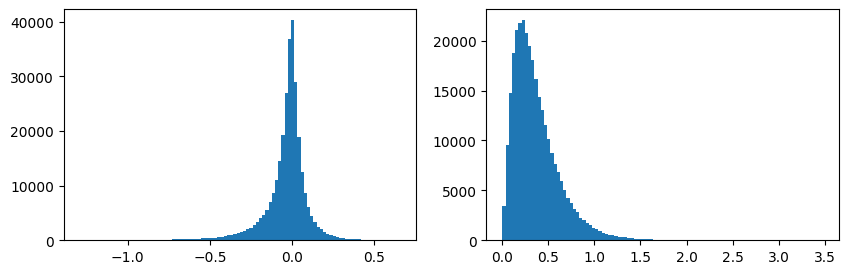

In [22]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(df_b['xF'], bins=100);

plt.subplot(1, 2, 2)
plt.hist(df_b['pT'], bins=100);

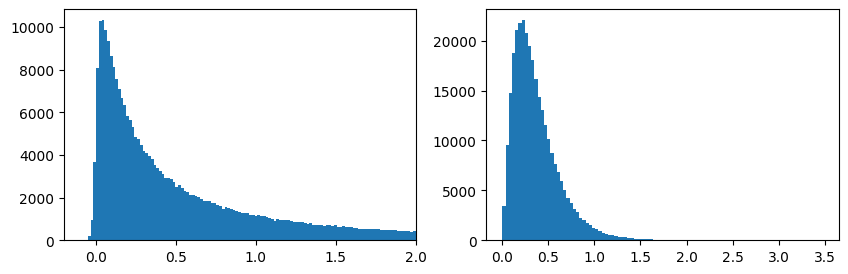

In [21]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(df['xF'], bins=1000);
plt.xlim((-0.2, 2))

plt.subplot(1, 2, 2)
plt.hist(df['pT'], bins=100);

In [30]:
pythia = pythia8.Pythia('printBanner = false')

file = open(f'pi.csv', 'w')
file.write('id,pT,xF,E\n')

pythia.readFile('config/config.cmnd')

boost = pythia8.Vec4()
boost.pz(mp * ((1 + (pz / mp) ** 2) ** 0.5 - 1) ** 0.5)
boost.e((boost.pz() ** 2 + mp ** 2) ** 0.5)

pythia.init()

for event in tqdm(range(N_events)):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    for j in range(entries):

        particle = pythia.event[j]

        id = particle.id()
        
        if abs(int(id)) == 211:

            P_mu = particle.p()
            pT = P_mu.pT()
            xF = 2 * P_mu.pz() / root_s
            E = P_mu.e()
            file.write(f'{id},{pT},{xF},{E}\n')

file.close()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.309      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 16 Feb 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 06 Nov 2023 at 21:27:53    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

  1%|          | 714/100000 [00:00<00:13, 7129.65it/s]


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  8.584e+00, e =  8.635e+00, m =  9.383e-01.
 Beam B: id =   2212, pz = -8.584e+00, e =  8.635e+00, m =  9.383e-01.

 In 1: id =   21, x =  1.345e-01, pdf =  8.354e-01 at Q2 =  7.854e-02.
 In 2: id =   21, x =  1.225e-02, pdf =  1.542e+00 at same Q2.

 Process non-diffractive with code 101 is 2 -> 2.
 Subprocess g g -> g g with code 111 is 2 -> 2.
 It has sHat =  4.911e-01,    tHat = -9.816e-02,    uHat = -3.929e-01,
       pTHat =  2.802e-01,   m3Hat =  0.000e+00,   m4Hat =  0.000e+00,
    thetaHat =  9.270e-01,  phiHat =  4.019e+00.
     alphaEM =  7.417e-03,  alphaS =  6.954e-01    at Q2 =  4.716e-01.

 Impact parameter b =  1.684e+00 gives enhancement factor =  5.015e-02.
 Max pT scale for MPI =  2.802e-01, ISR =  2.802e-01, FSR =  2.802e-01.
 Number of MPI =     1, ISR =     0, FSRproc =     0, FSRreson =     0.

 --------  End PYTHIA Info Listing  -------------------------------

  3%|▎         | 2901/100000 [00:00<00:13, 7069.25it/s]


 Pythia::next(): 2000 events have been generated 

 Pythia::next(): 3000 events have been generated 


  5%|▌         | 5102/100000 [00:00<00:13, 7017.41it/s]


 Pythia::next(): 4000 events have been generated 

 Pythia::next(): 5000 events have been generated 


  7%|▋         | 7265/100000 [00:01<00:12, 7169.18it/s]


 Pythia::next(): 6000 events have been generated 

 Pythia::next(): 7000 events have been generated 


 10%|▉         | 9504/100000 [00:01<00:12, 7367.75it/s]


 Pythia::next(): 8000 events have been generated 

 Pythia::next(): 9000 events have been generated 


 11%|█         | 10970/100000 [00:01<00:12, 7174.61it/s]


 Pythia::next(): 10000 events have been generated 

 Pythia::next(): 11000 events have been generated 
 PYTHIA Warning in Pythia::check: energy-momentum not quite conserved  


 13%|█▎        | 13182/100000 [00:01<00:11, 7286.45it/s]


 Pythia::next(): 12000 events have been generated 

 Pythia::next(): 13000 events have been generated 


 15%|█▌        | 15400/100000 [00:02<00:11, 7352.79it/s]


 Pythia::next(): 14000 events have been generated 

 Pythia::next(): 15000 events have been generated 
 PYTHIA Error in MiniStringFragmentation::fragment: no 1- or 2-body state found above mass threshold  
 PYTHIA Error in Pythia::next: hadronLevel failed; try again  


 17%|█▋        | 16878/100000 [00:02<00:11, 7348.96it/s]


 Pythia::next(): 16000 events have been generated 

 Pythia::next(): 17000 events have been generated 


 19%|█▉        | 19117/100000 [00:02<00:11, 7333.79it/s]

 PYTHIA Error in BeamRemnants::setKinematics: no momentum left for beam remnants  
 PYTHIA Error in Pythia::next: partonLevel failed; try again  

 Pythia::next(): 18000 events have been generated 

 Pythia::next(): 19000 events have been generated 


 21%|██▏       | 21408/100000 [00:02<00:10, 7543.17it/s]


 Pythia::next(): 20000 events have been generated 

 Pythia::next(): 21000 events have been generated 

 Pythia::next(): 22000 events have been generated 


 24%|██▍       | 24422/100000 [00:03<00:10, 7313.26it/s]


 Pythia::next(): 23000 events have been generated 

 Pythia::next(): 24000 events have been generated 


 26%|██▌       | 25895/100000 [00:03<00:10, 7308.23it/s]


 Pythia::next(): 25000 events have been generated 

 Pythia::next(): 26000 events have been generated 


 28%|██▊       | 28129/100000 [00:03<00:09, 7307.32it/s]


 Pythia::next(): 27000 events have been generated 
 PYTHIA Warning in SimpleSpaceShower::branch: used up beam momentum; retrying parton level  

 Pythia::next(): 28000 events have been generated 


 30%|███       | 30341/100000 [00:04<00:09, 7269.85it/s]


 Pythia::next(): 29000 events have been generated 

 Pythia::next(): 30000 events have been generated 


 32%|███▏      | 31888/100000 [00:04<00:09, 7352.03it/s]


 Pythia::next(): 31000 events have been generated 

 Pythia::next(): 32000 events have been generated 


 34%|███▍      | 34199/100000 [00:04<00:08, 7377.92it/s]


 Pythia::next(): 33000 events have been generated 

 Pythia::next(): 34000 events have been generated 


 36%|███▋      | 36448/100000 [00:04<00:08, 7426.41it/s]


 Pythia::next(): 35000 events have been generated 

 Pythia::next(): 36000 events have been generated 
 PYTHIA Error in StringFragmentation::fragment: stuck in joining  


 38%|███▊      | 37930/100000 [00:05<00:08, 7366.47it/s]


 Pythia::next(): 37000 events have been generated 

 Pythia::next(): 38000 events have been generated 


 41%|████      | 40900/100000 [00:05<00:08, 7383.73it/s]


 Pythia::next(): 39000 events have been generated 

 Pythia::next(): 40000 events have been generated 

 Pythia::next(): 41000 events have been generated 


 43%|████▎     | 43131/100000 [00:05<00:07, 7408.82it/s]


 Pythia::next(): 42000 events have been generated 

 Pythia::next(): 43000 events have been generated 


 45%|████▌     | 45329/100000 [00:06<00:07, 7025.84it/s]


 Pythia::next(): 44000 events have been generated 

 Pythia::next(): 45000 events have been generated 


 47%|████▋     | 46776/100000 [00:06<00:07, 7086.75it/s]


 Pythia::next(): 46000 events have been generated 

 Pythia::next(): 47000 events have been generated 


 49%|████▉     | 49023/100000 [00:06<00:06, 7354.19it/s]


 Pythia::next(): 48000 events have been generated 

 Pythia::next(): 49000 events have been generated 


 51%|█████     | 51233/100000 [00:07<00:06, 7284.80it/s]


 Pythia::next(): 50000 events have been generated 

 Pythia::next(): 51000 events have been generated 


 53%|█████▎    | 53433/100000 [00:07<00:06, 7236.49it/s]


 Pythia::next(): 52000 events have been generated 

 Pythia::next(): 53000 events have been generated 


 55%|█████▍    | 54883/100000 [00:07<00:06, 7177.30it/s]


 Pythia::next(): 54000 events have been generated 


 56%|█████▋    | 56319/100000 [00:07<00:06, 7011.30it/s]


 Pythia::next(): 55000 events have been generated 

 Pythia::next(): 56000 events have been generated 


 58%|█████▊    | 58458/100000 [00:08<00:05, 7095.92it/s]


 Pythia::next(): 57000 events have been generated 

 Pythia::next(): 58000 events have been generated 


 60%|█████▉    | 59929/100000 [00:08<00:05, 7181.63it/s]


 Pythia::next(): 59000 events have been generated 

 Pythia::next(): 60000 events have been generated 


 62%|██████▏   | 62124/100000 [00:08<00:05, 7256.68it/s]


 Pythia::next(): 61000 events have been generated 

 Pythia::next(): 62000 events have been generated 


 64%|██████▍   | 64272/100000 [00:08<00:05, 7031.00it/s]


 Pythia::next(): 63000 events have been generated 

 Pythia::next(): 64000 events have been generated 


 66%|██████▌   | 65736/100000 [00:09<00:04, 7134.69it/s]


 Pythia::next(): 65000 events have been generated 

 Pythia::next(): 66000 events have been generated 


 68%|██████▊   | 67895/100000 [00:09<00:04, 7135.27it/s]


 Pythia::next(): 67000 events have been generated 

 Pythia::next(): 68000 events have been generated 


 70%|███████   | 70076/100000 [00:09<00:04, 7143.13it/s]


 Pythia::next(): 69000 events have been generated 

 Pythia::next(): 70000 events have been generated 


 72%|███████▏  | 72268/100000 [00:09<00:03, 7141.23it/s]


 Pythia::next(): 71000 events have been generated 

 Pythia::next(): 72000 events have been generated 


 74%|███████▎  | 73730/100000 [00:10<00:03, 7131.06it/s]


 Pythia::next(): 73000 events have been generated 

 Pythia::next(): 74000 events have been generated 


 76%|███████▌  | 75867/100000 [00:10<00:03, 7073.81it/s]


 Pythia::next(): 75000 events have been generated 

 Pythia::next(): 76000 events have been generated 


 78%|███████▊  | 78021/100000 [00:10<00:03, 6958.75it/s]


 Pythia::next(): 77000 events have been generated 

 Pythia::next(): 78000 events have been generated 


 80%|████████  | 80173/100000 [00:11<00:02, 7065.88it/s]


 Pythia::next(): 79000 events have been generated 

 Pythia::next(): 80000 events have been generated 


 82%|████████▏ | 82399/100000 [00:11<00:02, 7304.93it/s]


 Pythia::next(): 81000 events have been generated 

 Pythia::next(): 82000 events have been generated 


 85%|████████▍ | 84586/100000 [00:11<00:02, 7237.52it/s]


 Pythia::next(): 83000 events have been generated 

 Pythia::next(): 84000 events have been generated 


 86%|████████▌ | 85991/100000 [00:13<00:06, 2036.55it/s]


 Pythia::next(): 85000 events have been generated 

 Pythia::next(): 86000 events have been generated 


 88%|████████▊ | 88087/100000 [00:13<00:03, 3779.35it/s]


 Pythia::next(): 87000 events have been generated 

 Pythia::next(): 88000 events have been generated 


 90%|█████████ | 90197/100000 [00:13<00:01, 5455.89it/s]


 Pythia::next(): 89000 events have been generated 

 Pythia::next(): 90000 events have been generated 


 92%|█████████▏| 92344/100000 [00:13<00:01, 6475.16it/s]


 Pythia::next(): 91000 events have been generated 

 Pythia::next(): 92000 events have been generated 


 94%|█████████▍| 93832/100000 [00:14<00:00, 6804.47it/s]


 Pythia::next(): 93000 events have been generated 

 Pythia::next(): 94000 events have been generated 


 96%|█████████▌| 95969/100000 [00:14<00:00, 6960.43it/s]


 Pythia::next(): 95000 events have been generated 

 Pythia::next(): 96000 events have been generated 


 98%|█████████▊| 98100/100000 [00:14<00:00, 6964.36it/s]


 Pythia::next(): 97000 events have been generated 

 Pythia::next(): 98000 events have been generated 


100%|██████████| 100000/100000 [00:15<00:00, 6634.62it/s]


 Pythia::next(): 99000 events have been generated 


In [31]:
df = pd.read_csv('pi.csv')

In [33]:
pp = df[df['id'] == 211].sample(n=10000, replace=True)
pm = df[df['id'] == -211].sample(n=10000, replace=True)

In [40]:
data = pd.concat([pp, pm]).reset_index(drop=True).sample(frac=1).reset_index(drop=True)

In [42]:
data.to_csv('pi.csv', index=False)